Prerequisite:: Understanding BFS

Modified From https://github.com/gbroques/missionaries-and-cannibals

Modified by Xiaomeng Ye.


In [1]:
import operator


class State:
    """Represents the state in the Missionaries and Cannibals problem."""

    def __init__(self, missionariesL, missionariesR, cannibalsL, cannibalsR, boat):
        self.value = (missionariesL, missionariesR, cannibalsL, cannibalsR, boat)
        self.missionariesL = missionariesL
        self.missionariesR = missionariesR
        self.cannibalsL = cannibalsL
        self.cannibalsR = cannibalsR
        #boat is a string of `L` or `R`
        self.boat = boat

    @classmethod
    def value_of(cls, state):
        if not cls.__is_valid_tuple(state):
            raise ValueError(str(state) + " must be a tuple with 5 elements.")
        return State(state[0], state[1], state[2], state[3], state[4])

    def is_valid(self):
        if self.missionariesL < 0 or self.missionariesR < 0 or self.cannibalsL < 0 or self.cannibalsR < 0:
            return False
        elif self.__missionaries_in_danger():
            return False
        else:
            return True

    def __missionaries_in_danger(self):
        ##DONE
        if (self.missionariesL==0 and self.missionariesL < self.cannibalsL) or (self.missionariesR==0 and self.missionariesR < self.cannibalsR):
          return False
        elif (self.missionariesL < self.cannibalsL) or (self.missionariesR < self.cannibalsR):
          return True
        else:
          return False

    @staticmethod
    def __is_valid_tuple(other):
        return isinstance(other, tuple) and len(other) == 5

    @staticmethod
    def __get_invalid_operand_error(other):
        return str(other) + " must be an instance of State or a tuple of length 5."

    def __repr__(self):
        return '<State {}>'.format(self.value)

    def __str__(self):
        return '<State {}>'.format(self.value)

    def __lt__(self, other):
        self.__ensure_instance_of_state(other)
        return self.value < other.value

    def __eq__(self, other):
        return isinstance(other, State) and self.value == other.value

    def __hash__(self):
        return hash(self.value)

    @staticmethod
    def __ensure_instance_of_state(other):
        if not isinstance(other, State):
            raise ValueError(str(other) + " must be an instance of State")

We first set up our initial state and the final goal state. Our goal is to move from the INITIAL_STATE and eventually reach the GOAL_STATE

In [2]:
EXAMPLE_STATE = State(2,1,1,2,'R')

INITIAL_STATE = State(3,0,3,0,'L') ##DONE
GOAL_STATE = State(0,3,0,3,'R') ##DONE

TODO, fill in the blanks below.

Careful, a mistake here may manifest later as a bug.

In [3]:
"""input: a single state
  output: a list of all reachable state from the input state
"""
def get_next_states(current_state):
  next_states = []
  # new_state = State(current_state.missionariesL, current_state.missionariesR, current_state.cannibalsL, current_state.cannibalsR, boat)
  if current_state.boat == 'L':
    new_state = State(current_state.missionariesL-1, current_state.missionariesR+1, current_state.cannibalsL, current_state.cannibalsR, 'R')
    if new_state.is_valid():
      next_states.append(new_state)
    new_state = State(current_state.missionariesL-2, current_state.missionariesR+2, current_state.cannibalsL, current_state.cannibalsR, 'R')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = State(current_state.missionariesL, current_state.missionariesR, current_state.cannibalsL-1, current_state.cannibalsR+1, 'R')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = new_state = State(current_state.missionariesL, current_state.missionariesR, current_state.cannibalsL-2, current_state.cannibalsR+2, 'R')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = new_state = new_state = State(current_state.missionariesL-1, current_state.missionariesR+1, current_state.cannibalsL-1, current_state.cannibalsR+1, 'R')
    if new_state.is_valid():
      next_states.append(new_state)
  if current_state.boat == 'R':
    new_state = State(current_state.missionariesL+1, current_state.missionariesR-1, current_state.cannibalsL, current_state.cannibalsR, 'L')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = new_state = State(current_state.missionariesL+2, current_state.missionariesR-2, current_state.cannibalsL, current_state.cannibalsR, 'L')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = new_state = State(current_state.missionariesL, current_state.missionariesR, current_state.cannibalsL+1, current_state.cannibalsR-1, 'L')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = new_state = State(current_state.missionariesL, current_state.missionariesR, current_state.cannibalsL+2, current_state.cannibalsR-2, 'L')
    if new_state.is_valid():
      next_states.append(new_state)
    #DONE
    new_state = new_state = State(current_state.missionariesL+1, current_state.missionariesR-1, current_state.cannibalsL+1, current_state.cannibalsR-1, 'L')
    if new_state.is_valid():
      next_states.append(new_state)
  return next_states

The above code works but it is far from elegant. Extra credit: Make it elegant, simple, not prone to error.

In [4]:
##Testing
new_state = State(INITIAL_STATE.missionariesL, INITIAL_STATE.missionariesR, INITIAL_STATE.cannibalsL-1, INITIAL_STATE.cannibalsR+1, 'R')
new_state.is_valid()

True

Implement the code above so you can run the following.

In [5]:
# Testing
a = get_next_states(INITIAL_STATE)
print(a)
print("----------------------------")

for s in a:
  n = get_next_states(s)

print(n)
print("----------------------------")

for b in n:
  v = get_next_states(b)
print(v)

[<State (3, 0, 2, 1, 'R')>, <State (3, 0, 1, 2, 'R')>, <State (2, 1, 2, 1, 'R')>]
----------------------------
[<State (3, 0, 2, 1, 'L')>, <State (3, 0, 3, 0, 'L')>]
----------------------------
[<State (3, 0, 2, 1, 'R')>, <State (3, 0, 1, 2, 'R')>, <State (2, 1, 2, 1, 'R')>]


Expected answer



```
[<State (3, 0, 2, 1, 'R')>,
 <State (3, 0, 1, 2, 'R')>,
 <State (2, 1, 2, 1, 'R')>]
```



Next, let's implement a breadth first search. Use an accumulator style, where we accumulate all nodes visited so far.

This function will print out a message as well as outputing true/false indicating whether the goal is found or not.

In [6]:
candidate_states = [INITIAL_STATE]
##DONE
##Input: List of states
##output: true or false, whether the goal state can be reached
##For convenience, print a message indicating "true"/"false" before returning the boolean output
def search_for_goal(candidate_states):
  reached = False
  #DONE
  if len(candidate_states) == 0:
      print("Lose! Cannot reach goal state")
      print("false")
      return reached

  for s in candidate_states:
    if s == GOAL_STATE:
        reached = True
        print("goal state reached! Win")
        print("true")
        return reached

  next_states = []
  for s in candidate_states:
    next_states.extend(get_next_states(s))          # Used ChatGPT to help accumulate values in the list using extend


  return search_for_goal(next_states)











search_for_goal(candidate_states)

goal state reached! Win
true


True

OK, with the code above, we know that we can actually reach the final state starting from certain candidate states.

But there are two major issues remaining.

First issue, try the code below.

It will run forever, why?

Why starting from
```[INITIAL_STATE]``` does not loop forever?



In [7]:
search_for_goal([State(4,0,4,0,'L')])

KeyboardInterrupt: ignored

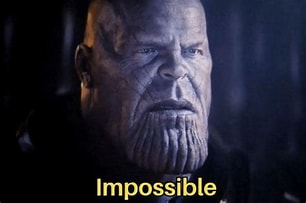

Can you fix the code so it does not run forever? (''No'' is not an scoring answer) Call your new function ```search_for_goal_v2```. This function can tell you whether a goal state is reachable starting from certain states.



Hint: it's not a simple one-line fix, but it is not far from that.

In [8]:
def search_for_goal_v2(candidate_states):
  visited = []
  while len(candidate_states) != 0:
    next_round_states = []
    for each_candidate in candidate_states:
      if each_candidate == GOAL_STATE:
        print("goal state reached! Win")
        return True
      for each_next_state in get_next_states(each_candidate):
        if each_next_state in visited:
          continue
        visited.append(each_next_state)
        next_round_states.append(each_next_state)
    candidate_states = next_round_states
  print("lose! Cannot reach goal state")


In [9]:
search_for_goal_v2([INITIAL_STATE])

goal state reached! Win


True

In [10]:
search_for_goal_v2([State(4,0,4,0,'L')])

lose! Cannot reach goal state


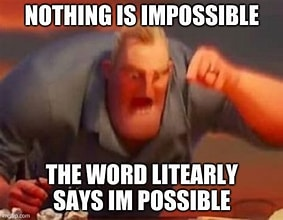

OK. continue.


The second issue is that, even though our function tells us whether the goal can be reached or not, it does not tell us how it can be reached. We still want to know how to solve the problem.

We want to modify our code so that when a state A transition into state B, state B remembers information about state A. This way, when we finally reach the GOAL_STATE, we can trace back and see the whole history of states.

TODO::

Modify State, so that it has a place to remember who is its parent state

In [11]:
import operator


##DONE
class State:
    """Represents the state in the Missionaries and Cannibals problem."""


    def __init__(self, missionariesL, missionariesR, cannibalsL, cannibalsR, boat,prevState=None):     # Used chatGPT to understand how to 'overload' constructor in python. In other words make a State with or without a prevState
        self.value = (missionariesL, missionariesR, cannibalsL, cannibalsR, boat)
        self.missionariesL = missionariesL
        self.missionariesR = missionariesR
        self.cannibalsL = cannibalsL
        self.cannibalsR = cannibalsR
        #boat is a string of `L` or `R`
        self.boat = boat
        self.prevState = prevState



    @classmethod
    def value_of(cls, state):
        if not cls.__is_valid_tuple(state):
            raise ValueError(str(state) + " must be a tuple with 5 elements.")
        return State(state[0], state[1], state[2], state[3], state[4])

    def is_valid(self):
        if self.missionariesL < 0 or self.missionariesR < 0 or self.cannibalsL < 0 or self.cannibalsR < 0:
            return False
        elif self.__missionaries_in_danger():
            return False
        else:
            return True

    def __missionaries_in_danger(self):
        ##DONE
        if (self.missionariesL==0 and self.missionariesL < self.cannibalsL) or (self.missionariesR==0 and self.missionariesR < self.cannibalsR):
          return False
        elif (self.missionariesL < self.cannibalsL) or (self.missionariesR < self.cannibalsR):
          return True
        else:
          return False

    @staticmethod
    def __is_valid_tuple(other):
        return isinstance(other, tuple) and len(other) == 5

    @staticmethod
    def __get_invalid_operand_error(other):
        return str(other) + " must be an instance of State or a tuple of length 5."

    def __repr__(self):
        return '<State {}>'.format(self.value)

    def __str__(self):
        return '<State {}>'.format(self.value)

    def __lt__(self, other):
        self.__ensure_instance_of_state(other)
        return self.value < other.value

    def __eq__(self, other):
        return isinstance(other, State) and self.value == other.value

    def __hash__(self):
        return hash(self.value)

    @staticmethod
    def __ensure_instance_of_state(other):
        if not isinstance(other, State):
            raise ValueError(str(other) + " must be an instance of State")

Bug warning:
you may need to rerun the following. Try NOT rerunning the below, and see if you encounter any bug.

In [12]:
EXAMPLE_STATE = State(2,1,1,2,'R')
##DONE
INITIAL_STATE = State(3,0,3,0,'L') #DONE
GOAL_STATE = State(0,3,0,3,'R',State(1,2,1,2,'L')) #DONE

TODO::

Modify get_next_states

So that when you create a new state, you remember its ancestor/parent

In [13]:
testState = State(0,0,0,0,'L')
"""input: a single state
  output: a list of all reachable state from the input state
"""
def get_next_states0(current_state):
  next_states=[]
  #DONE
  if current_state.boat == 'L':
    x = 1

    new_state_both = State(current_state.missionariesL-x,
                           current_state.missionariesR+x,
                           current_state.cannibalsL-x,
                           current_state.cannibalsR+x,
                           'R',
                           current_state)

    if new_state_both.is_valid():
        next_states.append(new_state_both)

    while x < 3:
      new_state_miss = State(current_state.missionariesL-x,
                             current_state.missionariesR+x,
                             current_state.cannibalsL,
                             current_state.cannibalsR,
                             'R',
                             current_state)

      new_state_can = State(current_state.missionariesL,
                            current_state.missionariesR,
                            current_state.cannibalsL-x,
                            current_state.cannibalsR+x,
                            'R',
                            current_state)


      if new_state_miss.is_valid():
        next_states.append(new_state_miss)

      if new_state_can.is_valid():
        next_states.append(new_state_can)



      x = x + 1

  if current_state.boat == 'R':
    x = 1

    new_state_both = State(current_state.missionariesL+x,
                           current_state.missionariesR-x,
                           current_state.cannibalsL+x,
                           current_state.cannibalsR-x,
                           'L',
                           current_state)

    if new_state_both.is_valid():
      next_states.append(new_state_both)

    while x < 3:
      new_state_miss = State(current_state.missionariesL+x,
                             current_state.missionariesR-x,
                             current_state.cannibalsL,
                             current_state.cannibalsR,
                             'L',
                             current_state)

      new_state_can = State(current_state.missionariesL,
                            current_state.missionariesR,
                            current_state.cannibalsL+x,
                            current_state.cannibalsR-x,
                            'L',
                            current_state)

      if new_state_miss.is_valid():
        next_states.append(new_state_miss)

      if new_state_can.is_valid():
        next_states.append(new_state_can)

      x = x + 1




  return next_states


In [14]:
#TESTING
state = get_next_states0(INITIAL_STATE)

print(state)

for s in state:
  next_state = get_next_states0(s)

print(next_state[0].prevState.prevState.prevState)


[<State (2, 1, 2, 1, 'R')>, <State (3, 0, 2, 1, 'R')>, <State (3, 0, 1, 2, 'R')>]
None


In [15]:
#TESTING
get_next_states0(State(0,3,0,3,'R'))

[<State (1, 2, 1, 2, 'L')>,
 <State (0, 3, 1, 2, 'L')>,
 <State (0, 3, 2, 1, 'L')>]

TODO::

Create ```search_for_goal_v3```, which now returns the goal state reached.

In [16]:
def search_for_goal_v3(candidate_states):
  #DONE
  visited = []
  while len(candidate_states) > 0:
    next_states=[]
    for state in candidate_states:
      if state == GOAL_STATE:
        print("Reached goal state")
        return state
      for next in get_next_states0(state):
        if next in visited:
          continue
        visited.append(next)
        next_states.append(next)
    candidate_states = next_states
  print("Cannot reach goal state")






In [17]:
goal_state = search_for_goal_v3([INITIAL_STATE])

Reached goal state


In [18]:
print(goal_state.prevState)

<State (1, 2, 1, 2, 'L')>


Print out the ancestors of the goal state one by one.

In [19]:
current = goal_state
while True:
  print(current)
  current = current.prevState
  if current == None:
    break

<State (0, 3, 0, 3, 'R')>
<State (1, 2, 1, 2, 'L')>
<State (0, 3, 1, 2, 'R')>
<State (0, 3, 3, 0, 'L')>
<State (0, 3, 2, 1, 'R')>
<State (2, 1, 2, 1, 'L')>
<State (1, 2, 1, 2, 'R')>
<State (3, 0, 1, 2, 'L')>
<State (3, 0, 0, 3, 'R')>
<State (3, 0, 2, 1, 'L')>
<State (2, 1, 2, 1, 'R')>
<State (3, 0, 3, 0, 'L')>


Reverse the list of ancestors. So that we can print out a list of states, starting from the initial state and ending at the goal state.

In [20]:
history = []
current = goal_state
while True:
  history.append(current)
  current = current.prevState
  if current == None:
    break
history.reverse()
print(history)

[<State (3, 0, 3, 0, 'L')>, <State (2, 1, 2, 1, 'R')>, <State (3, 0, 2, 1, 'L')>, <State (3, 0, 0, 3, 'R')>, <State (3, 0, 1, 2, 'L')>, <State (1, 2, 1, 2, 'R')>, <State (2, 1, 2, 1, 'L')>, <State (0, 3, 2, 1, 'R')>, <State (0, 3, 3, 0, 'L')>, <State (0, 3, 1, 2, 'R')>, <State (1, 2, 1, 2, 'L')>, <State (0, 3, 0, 3, 'R')>]
